In [41]:
import pandas as pd

df = pd.read_csv("k8s_raw_dataset.csv")


In [42]:
df.shape

(100000, 13)

In [43]:
df.head()

,timestamp,namespace,pod_name,node_name,cpu_usage_cores,memory_usage_mb,restarts,status,uptime_seconds,container_count,host_ip,pod_ip,label
0,2025-03-28 04:10:56.913239,kube-system,pod-435,node-4,0.128223,367.266872,1,Running,51818,1,192.168.8.75,10.244.91.152,0
1,2025-03-28 04:11:11.913237,prod,pod-753,node-4,0.496075,1106.722179,9,CrashLoopBackOff,17,3,192.168.201.219,10.244.39.244,1
2,2025-03-28 04:11:26.913235,dev,pod-28,node-5,0.265306,349.939401,1,Running,84930,3,192.168.62.102,10.244.197.214,0
3,2025-03-28 04:11:41.913233,default,pod-421,node-4,0.269564,318.324579,1,Pending,74225,2,192.168.217.172,10.244.9.64,0
4,2025-03-28 04:11:56.913232,prod,pod-915,node-3,0.174527,218.905994,0,Running,15627,2,192.168.250.216,10.244.78.116,0


In [44]:
print(" Missing values:")
print(df.isnull().sum())


 Missing values:
timestamp          0
namespace          0
pod_name           0
node_name          0
cpu_usage_cores    0
memory_usage_mb    0
restarts           0
status             0
uptime_seconds     0
container_count    0
host_ip            0
pod_ip             0
label              0
dtype: int64


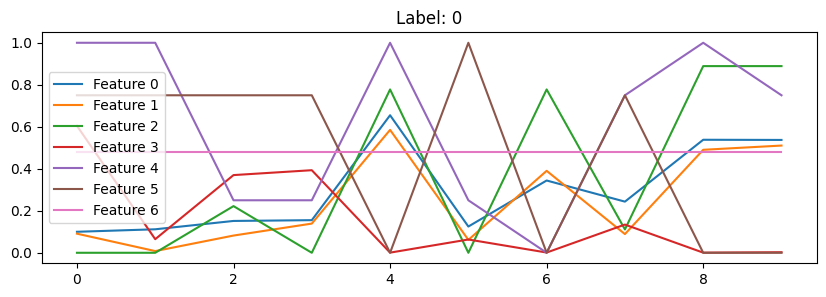

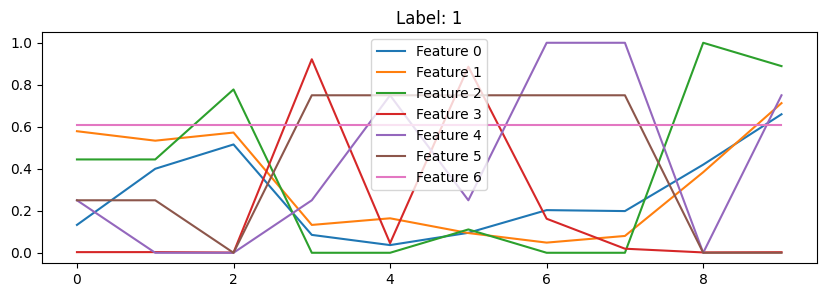

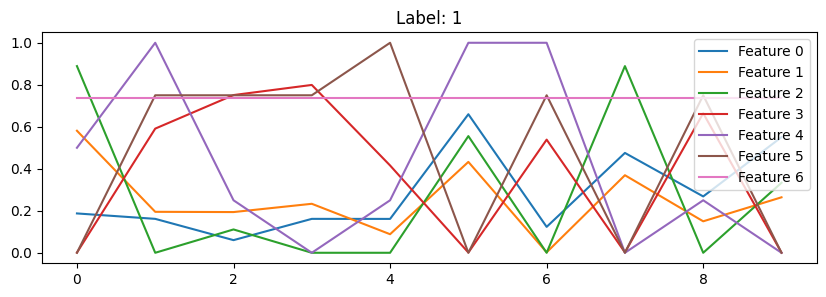

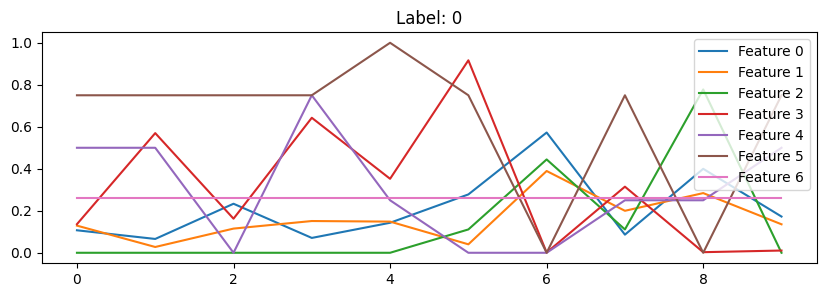

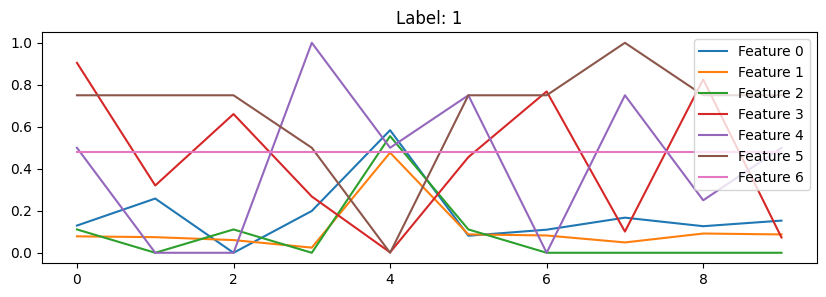

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in np.random.choice(len(X_train), 5, replace=False):
    plt.figure(figsize=(10, 3))
    for j in range(X_train.shape[2]):
        plt.plot(X_train[i, :, j], label=f'Feature {j}')
    plt.title(f"Label: {y_train[i]}")
    plt.legend()
    plt.show()

# ***LSTM BASED KUBERNETES POD FAILURE PREDICTION MODEL***

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
df = pd.read_csv('k8s_raw_dataset.csv')
print("Shape:", df.shape)
df.head()

Shape: (100000, 13)


,timestamp,namespace,pod_name,node_name,cpu_usage_cores,memory_usage_mb,restarts,status,uptime_seconds,container_count,host_ip,pod_ip,label
0,2025-03-28 04:10:56.913239,kube-system,pod-435,node-4,0.128223,367.266872,1,Running,51818,1,192.168.8.75,10.244.91.152,0
1,2025-03-28 04:11:11.913237,prod,pod-753,node-4,0.496075,1106.722179,9,CrashLoopBackOff,17,3,192.168.201.219,10.244.39.244,1
2,2025-03-28 04:11:26.913235,dev,pod-28,node-5,0.265306,349.939401,1,Running,84930,3,192.168.62.102,10.244.197.214,0
3,2025-03-28 04:11:41.913233,default,pod-421,node-4,0.269564,318.324579,1,Pending,74225,2,192.168.217.172,10.244.9.64,0
4,2025-03-28 04:11:56.913232,prod,pod-915,node-3,0.174527,218.905994,0,Running,15627,2,192.168.250.216,10.244.78.116,0


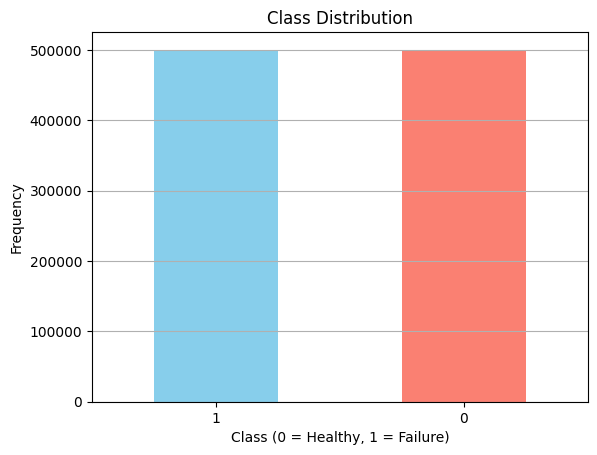

In [16]:
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Healthy, 1 = Failure)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))
y = df['target'].values

In [18]:
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

In [20]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, 12)),
    Dropout(0.4),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer=Adam(learning_rate=0.0008), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,673 (127.63 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=2
)

Epoch 1/20
21875/21875 - 77s - 4ms/step - accuracy: 0.8235 - loss: 0.3805 - val_accuracy: 0.8283 - val_loss: 0.3661
Epoch 2/20
21875/21875 - 73s - 3ms/step - accuracy: 0.8284 - loss: 0.3705 - val_accuracy: 0.8286 - val_loss: 0.3648
Epoch 3/20
21875/21875 - 81s - 4ms/step - accuracy: 0.8287 - loss: 0.3693 - val_accuracy: 0.8303 - val_loss: 0.3626
Epoch 4/20
21875/21875 - 83s - 4ms/step - accuracy: 0.8290 - loss: 0.3685 - val_accuracy: 0.8303 - val_loss: 0.3624
Epoch 5/20
21875/21875 - 80s - 4ms/step - accuracy: 0.8291 - loss: 0.3680 - val_accuracy: 0.8303 - val_loss: 0.3621
Epoch 6/20
21875/21875 - 84s - 4ms/step - accuracy: 0.8293 - loss: 0.3676 - val_accuracy: 0.8307 - val_loss: 0.3620
Epoch 7/20
21875/21875 - 80s - 4ms/step - accuracy: 0.8290 - loss: 0.3675 - val_accuracy: 0.8307 - val_loss: 0.3620
Epoch 8/20
21875/21875 - 83s - 4ms/step - accuracy: 0.8291 - loss: 0.3671 - val_accuracy: 0.8307 - val_loss: 0.3619
Epoch 9/20
21875/21875 - 81s - 4ms/step - accuracy: 0.8295 - loss: 0.367

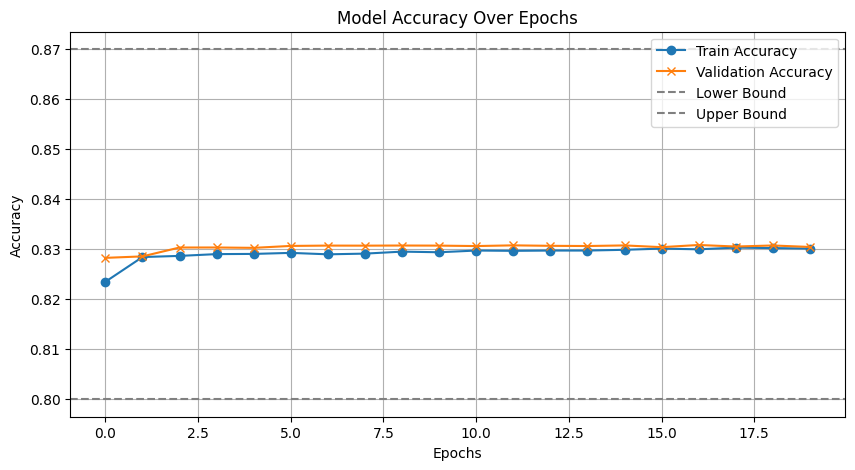

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.axhline(0.80, color='gray', linestyle='--', label='Lower Bound')
plt.axhline(0.87, color='gray', linestyle='--', label='Upper Bound')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step
 Test Accuracy: 0.82992

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     74976
           1       0.82      0.84      0.83     75024

    accuracy                           0.83    150000
   macro avg       0.83      0.83      0.83    150000
weighted avg       0.83      0.83      0.83    150000



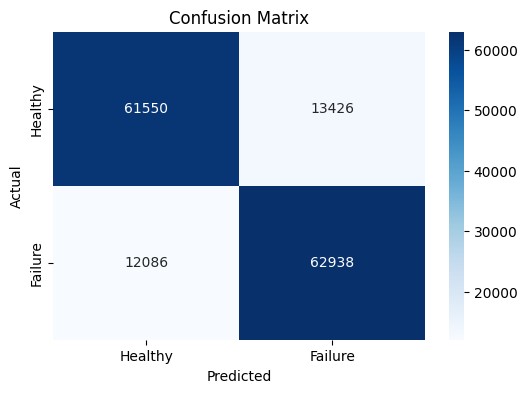

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Failure'], yticklabels=['Healthy', 'Failure'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
model.save("lstm_pod_failure_model.h5")
print(" Model saved as lstm_pod_failure_model.h5")


 Model saved as lstm_pod_failure_model.h5


In [28]:
from tensorflow.keras.models import load_model

loaded_model = load_model("lstm_pod_failure_model.h5")
print(" Model loaded successfully!")


 Model loaded successfully!


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


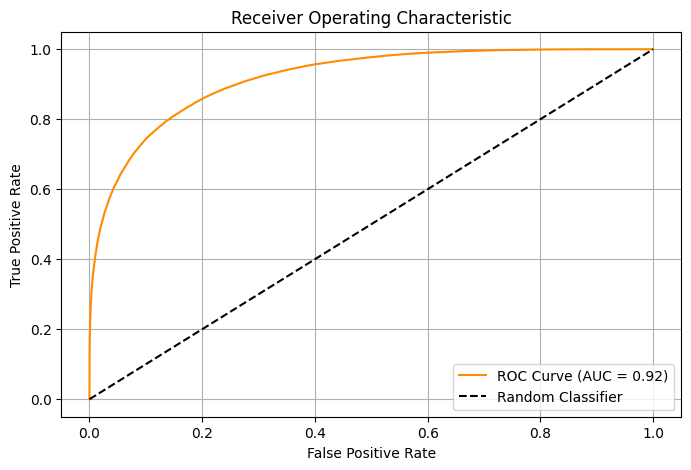

In [29]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


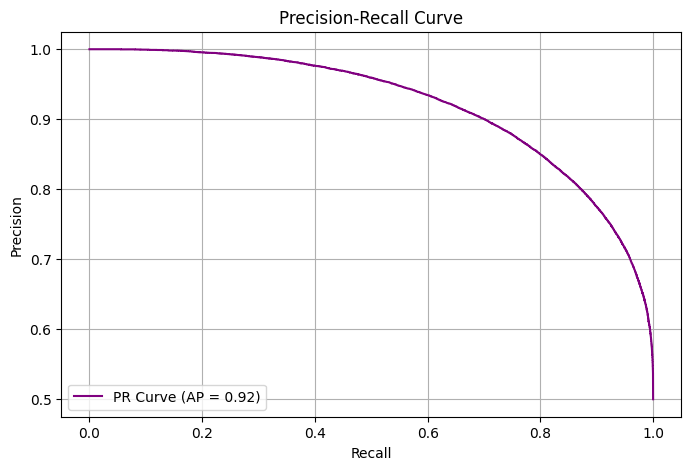

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

# Plot Precision-Recall
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.2f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


REMEDIATION MODEL

In [48]:
import pandas as pd

df = pd.read_csv('k8s_raw_dataset.csv')

df.head()


,timestamp,namespace,pod_name,node_name,cpu_usage_cores,memory_usage_mb,restarts,status,uptime_seconds,container_count,host_ip,pod_ip,label
0,2025-03-28 04:10:56.913239,kube-system,pod-435,node-4,0.128223,367.266872,1,Running,51818,1,192.168.8.75,10.244.91.152,0
1,2025-03-28 04:11:11.913237,prod,pod-753,node-4,0.496075,1106.722179,9,CrashLoopBackOff,17,3,192.168.201.219,10.244.39.244,1
2,2025-03-28 04:11:26.913235,dev,pod-28,node-5,0.265306,349.939401,1,Running,84930,3,192.168.62.102,10.244.197.214,0
3,2025-03-28 04:11:41.913233,default,pod-421,node-4,0.269564,318.324579,1,Pending,74225,2,192.168.217.172,10.244.9.64,0
4,2025-03-28 04:11:56.913232,prod,pod-915,node-3,0.174527,218.905994,0,Running,15627,2,192.168.250.216,10.244.78.116,0


In [51]:

df['failure_predicted'] = (df['label'] == 1)

df['cpu_high'] = df['cpu_usage_cores'] > 0.85
df['memory_high'] = df['memory_usage_mb'] > 0.90



In [52]:
def remediation_action(row):
    if row['cpu_high']:
        return 'Scale pod or throttle CPU usage'
    elif row['memory_high']:
        return 'Restart pod or allocate more memory'

    elif row['failure_predicted']:
        return 'Auto-restart pod or send alert'
    else:
        return 'No action needed'

df['remediation'] = df.apply(remediation_action, axis=1)


In [54]:
df_remediation = df[df['remediation'] != 'No action needed']
df_remediation[['pod_name', 'cpu_usage_cores', 'memory_usage_mb', 'remediation']].head(10)


,pod_name,cpu_usage_cores,memory_usage_mb,remediation
0,pod-435,0.128223,367.266872,Restart pod or allocate more memory
1,pod-753,0.496075,1106.722179,Restart pod or allocate more memory
2,pod-28,0.265306,349.939401,Restart pod or allocate more memory
3,pod-421,0.269564,318.324579,Restart pod or allocate more memory
4,pod-915,0.174527,218.905994,Restart pod or allocate more memory
5,pod-208,0.256892,289.162495,Restart pod or allocate more memory
6,pod-356,0.147382,168.631562,Restart pod or allocate more memory
7,pod-76,0.201413,257.136319,Restart pod or allocate more memory
8,pod-528,0.203099,179.499259,Restart pod or allocate more memory
9,pod-252,0.050890,284.117404,Restart pod or allocate more memory


In [55]:
df_remediation.to_csv('pod_remediation_actions.csv', index=False)


In [56]:
for index, row in df_remediation.iterrows():
    print(f"[ACTION] For Pod: {row['pod_name']} — {row['remediation']}")



Streaming output truncated to the last 5000 lines.
[ACTION] For Pod: pod-837 — Restart pod or allocate more memory
[ACTION] For Pod: pod-633 — Restart pod or allocate more memory
[ACTION] For Pod: pod-99 — Restart pod or allocate more memory
[ACTION] For Pod: pod-666 — Restart pod or allocate more memory
[ACTION] For Pod: pod-295 — Restart pod or allocate more memory
[ACTION] For Pod: pod-65 — Restart pod or allocate more memory
[ACTION] For Pod: pod-808 — Restart pod or allocate more memory
[ACTION] For Pod: pod-265 — Restart pod or allocate more memory
[ACTION] For Pod: pod-312 — Restart pod or allocate more memory
[ACTION] For Pod: pod-970 — Restart pod or allocate more memory
[ACTION] For Pod: pod-607 — Restart pod or allocate more memory
[ACTION] For Pod: pod-490 — Restart pod or allocate more memory
[ACTION] For Pod: pod-91 — Restart pod or allocate more memory
[ACTION] For Pod: pod-992 — Restart pod or allocate more memory
[ACTION] For Pod: pod-741 — Scale pod or throttle CPU us

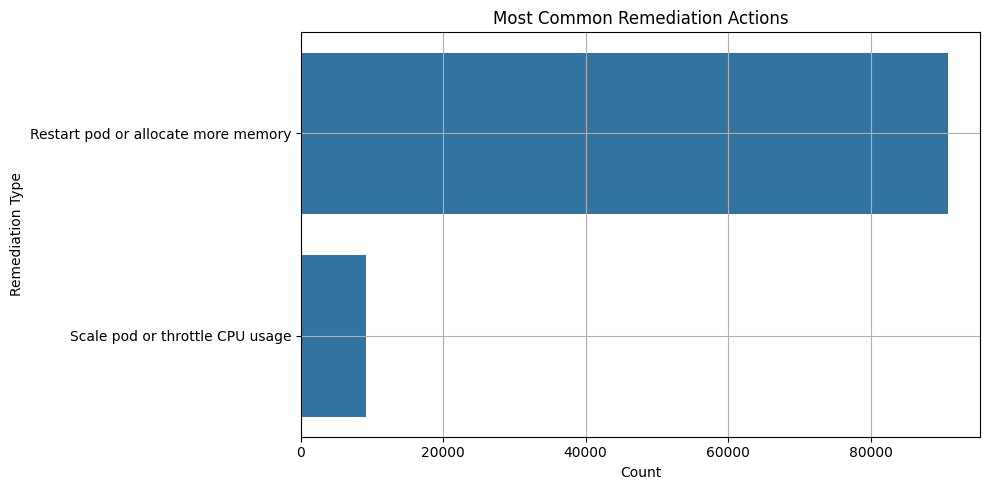

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df_remediation, y='remediation', order=df_remediation['remediation'].value_counts().index)
plt.title('Most Common Remediation Actions')
plt.xlabel('Count')
plt.ylabel('Remediation Type')
plt.grid(True)
plt.tight_layout()
plt.show()
